In [ ]:
#Data Wrangling

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/DELL/Desktop/DATA SCIENCE/assignment.csv")
print(df.shape)
df.head()

(5, 9)


,Employee_ID,Name,Age,Department,Salary ($),Joining_Date,Performance_Score,Promotions,Remarks
0,101,John Doe,35,Sales,75000,10/08/15,8,2,Excellent
1,102,Jane Smith,-,Marketing,65000,15/03/18,7,1,-
2,103,Michael Lee,29,Sales,60000,20/07/20,5,0,Average
3,104,Sarah Kim,45,-,90000,28/02/10,9,3,Excellent
4,105,-,50,Operations,-,22/05/08,7,1,Good


In [ ]:
#deal with missing data
#1.drop data-drop the whole row or whole column
#2.replace data-replace it by mean/frequency(mode) or based on other functions 

In [5]:
df=df.replace("-",np.NaN)
df.head()

,Employee_ID,Name,Age,Department,Salary ($),Joining_Date,Performance_Score,Promotions,Remarks
0,101,John Doe,35,Sales,75000,10/08/15,8,2,Excellent
1,102,Jane Smith,NaN,Marketing,65000,15/03/18,7,1,NaN
2,103,Michael Lee,29,Sales,60000,20/07/20,5,0,Average
3,104,Sarah Kim,45,NaN,90000,28/02/10,9,3,Excellent
4,105,NaN,50,Operations,NaN,22/05/08,7,1,Good


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_ID        5 non-null      int64 
 1   Name               4 non-null      object
 2   Age                4 non-null      object
 3   Department         4 non-null      object
 4   Salary ($)         4 non-null      object
 5   Joining_Date       5 non-null      object
 6   Performance_Score  5 non-null      int64 
 7   Promotions         5 non-null      int64 
 8   Remarks            4 non-null      object
dtypes: int64(3), object(6)
memory usage: 492.0+ bytes


In [9]:
df.isnull().sum()

Employee_ID          0
Name                 1
Age                  1
Department           1
Salary ($)           1
Joining_Date         0
Performance_Score    0
Promotions           0
Remarks              1
dtype: int64

In [11]:
#1.	Handling Missing Values
#For Age and Salary: Impute using the median or mean.
avg_age=df['Age'].astype('float').mean(axis=0)
df['Age'].replace(np.nan,avg_age,inplace=True)
print("Average of Age:",avg_age)
df['Age']

Average of Age: 39.75


C:\Users\DELL\AppData\Local\Temp\ipykernel_1908\4006115811.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(np.nan,avg_age,inplace=True)


0       35
1    39.75
2       29
3       45
4       50
Name: Age, dtype: object

In [13]:
avg_salary=df['Salary ($)'].astype('float').mean(axis=0)
df['Salary ($)'].replace(np.nan,avg_age,inplace=True)
print("Average of Age:",avg_salary)
df['Salary ($)']

Average of Age: 72500.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\1909920069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary ($)'].replace(np.nan,avg_age,inplace=True)


0    75000
1    65000
2    60000
3    90000
4    39.75
Name: Salary ($), dtype: object

In [13]:
#For Name: If missing, replace it with "Unknown" or drop the row.
# simply drop whole row with NaN in "price" column
df.dropna(subset=["Name"], axis=0, inplace=True)
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

,Employee_ID,Name,Age,Department,Salary ($),Joining_Date,Performance_Score,Promotions,Remarks
0,101,John Doe,35,Sales,75000,10/08/15,8,2,Excellent
1,102,Jane Smith,39.75,Marketing,65000,15/03/18,7,1,NaN
2,103,Michael Lee,29,Sales,60000,20/07/20,5,0,Average
3,104,Sarah Kim,45,NaN,90000,28/02/10,9,3,Excellent


In [ ]:
#2.	Correcting Data Inconsistencies
#Issue: Age for employee ID 102 is missing, and department for Sarah Kim (ID 104) is missing.
#Approach: Identify and correct inconsistencies by:
#Ensuring Age is within a reasonable range (e.g., above 18).
#For department, you can assign values based on similar records or knowledge about the role (e.g., guessing the department for Sarah Kim based on her role).

In [15]:
df[["Age"]] = df[["Age"]].astype("int")
df.head()

,Employee_ID,Name,Age,Department,Salary ($),Joining_Date,Performance_Score,Promotions,Remarks
0,101,John Doe,35,Sales,75000,10/08/15,8,2,Excellent
1,102,Jane Smith,39,Marketing,65000,15/03/18,7,1,NaN
2,103,Michael Lee,29,Sales,60000,20/07/20,5,0,Average
3,104,Sarah Kim,45,NaN,90000,28/02/10,9,3,Excellent


In [17]:
df['Department']

0        Sales
1    Marketing
2        Sales
3          NaN
Name: Department, dtype: object

In [19]:
df['Department'].value_counts()

Department
Sales        2
Marketing    1
Name: count, dtype: int64

In [21]:
df['Department'].replace(np.NaN,"Sales",inplace=True)
df.head()

,Employee_ID,Name,Age,Department,Salary ($),Joining_Date,Performance_Score,Promotions,Remarks
0,101,John Doe,35,Sales,75000,10/08/15,8,2,Excellent
1,102,Jane Smith,39,Marketing,65000,15/03/18,7,1,NaN
2,103,Michael Lee,29,Sales,60000,20/07/20,5,0,Average
3,104,Sarah Kim,45,Sales,90000,28/02/10,9,3,Excellent


In [43]:
df['Remarks']
df['Remarks'].value_counts()

Remarks
Excellent    2
Average      1
Name: count, dtype: int64

In [37]:
df['Remarks'].replace(np.NaN,"Excellent",inplace=True)
df[["Performance_Score","Promotions"]]=df[["Performance_Score","Promotions"]].astype("float")
df[["Age"]]=df[["Age"]].astype("int")
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1908\966419820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Remarks'].replace(np.NaN,"Excellent",inplace=True)


,Employee_ID,Name,Age,Department,Salary ($),Joining_Date,Performance_Score,Promotions,Remarks
0,101,John Doe,35,Sales,75000,10/08/15,8.0,2.0,Excellent
1,102,Jane Smith,39,Marketing,65000,15/03/18,7.0,1.0,Excellent
2,103,Michael Lee,29,Sales,60000,20/07/20,5.0,0.0,Average
3,104,Sarah Kim,45,Sales,90000,28/02/10,9.0,3.0,Excellent


Text(0.5, 1.0, 'Performance_Score bins')

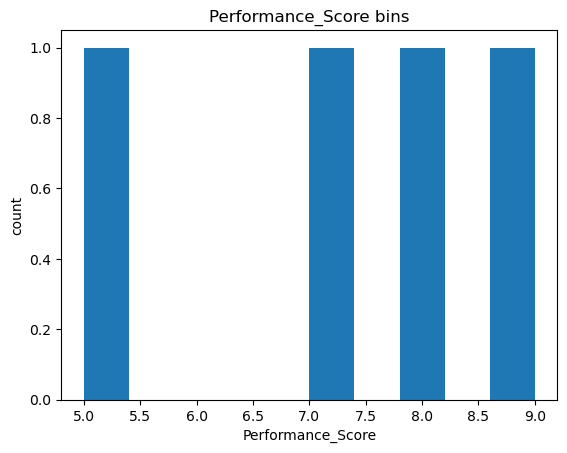

In [45]:
df["Performance_Score"]=df["Performance_Score"].astype(int,copy=True)
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Performance_Score"])
# set x/y labels and plot title
plt.pyplot.xlabel("Performance_Score")
plt.pyplot.ylabel("count")
plt.pyplot.title("Performance_Score bins")

In [47]:
bins=np.linspace(min(df["Performance_Score"]),max(df["Performance_Score"]),4)
bins

array([5.        , 6.33333333, 7.66666667, 9.        ])

In [49]:
group_names=["Low","Medium","High"]
df['Performance_Score-binned']=pd.cut(df['Performance_Score'],bins,labels=group_names,include_lowest=True)
df[['Performance_Score','Performance_Score-binned']].head(20)

,Performance_Score,Performance_Score-binned
0,8,High
1,7,Medium
2,5,Low
3,9,High


In [53]:
df["Performance_Score-binned"].value_counts()

Performance_Score-binned
High      2
Low       1
Medium    1
Name: count, dtype: int64

In [55]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Department', 'Salary ($)',
       'Joining_Date', 'Performance_Score', 'Promotions', 'Remarks',
       'Performance_Score-binned'],
      dtype='object')

In [57]:
df.head()

,Employee_ID,Name,Age,Department,Salary ($),Joining_Date,Performance_Score,Promotions,Remarks,Performance_Score-binned
0,101,John Doe,35,Sales,75000,10/08/15,8,2.0,Excellent,High
1,102,Jane Smith,39,Marketing,65000,15/03/18,7,1.0,Excellent,Medium
2,103,Michael Lee,29,Sales,60000,20/07/20,5,0.0,Average,Low
3,104,Sarah Kim,45,Sales,90000,28/02/10,9,3.0,Excellent,High


In [59]:
df.to_csv("Emp_detail.csv",index=False)